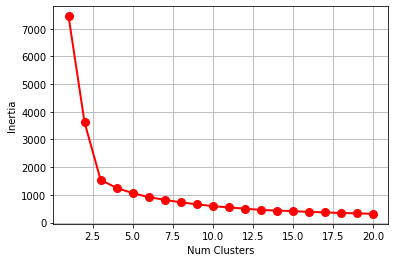

In [23]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Constant
DATASET1 = "./dataSets/DS_3Clusters_999Points.txt"
DATASET2 = "./dataSets/DS2_3Clusters_999Points.txt"
DATASET3 = "./dataSets/DS_5Clusters_10000Points.txt"
LOOPS = 20
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001

def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset: path file
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(np.asarray(list(map(float, point.split("::"))))) 
    return points



def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()

    
def select_clusters(dataset, loops, max_iterations, init_cluster, tolerance):
    # Read data set
    points = dataset_to_list_points(dataset)

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance)
        # Calculate Kmeans
        kmeans.fit(points)
        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)
    
    
if __name__ == '__main__':
    select_clusters(DATASET1, LOOPS, MAX_ITERATIONS, INITIALIZE_CLUSTERS,
                    CONVERGENCE_TOLERANCE)


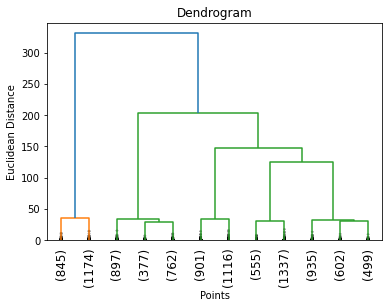

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Constant
DATASET1 = "./dataSets/DS_3Clusters_999Points.txt"
DATASET2 = "./dataSets/DS2_3Clusters_999Points.txt"
DATASET3 = "./dataSets/DS_5Clusters_10000Points.txt"


def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset: path file
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(np.asarray(list(map(float, point.split("::"))))) 
    return points


def plot_dendrogram(dataset):
    points = dataset_to_list_points(dataset)

    # Calculate distances between points or groups of points
    Z = linkage(points, metric='euclidean', method='ward')

    plt.title('Dendrogram')
    plt.xlabel('Points')
    plt.ylabel('Euclidean Distance')

    # Generate Dendrogram
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True
    )

    plt.show()


if __name__ == '__main__':
    plot_dendrogram(DATASET3)

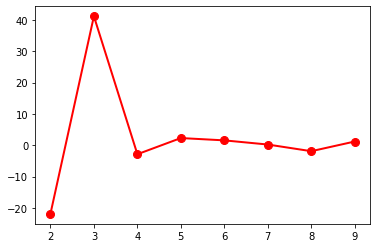

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Constant
DATASET1 = "./dataSets/DS_3Clusters_999Points.txt"
DATASET2 = "./dataSets/DS2_3Clusters_999Points.txt"
DATASET3 = "./dataSets/DS_5Clusters_10000Points.txt"


def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset: path file
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(np.asarray(list(map(float, point.split("::"))))) 
    return points


def plot_gap(dataset):
    points = dataset_to_list_points(dataset)

    # Calculate distances between points or groups of points
    Z = linkage(points, metric='euclidean', method='ward')

    # Obtain the last 10 distances between points
    last = Z[-10:, 2]
    num_clustres = np.arange(1, len(last) + 1)

    # Calculate Gap
    gap = np.diff(last, n=2)  # second derivative
    plt.plot(num_clustres[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
    plt.show()


if __name__ == '__main__':
    plot_gap(DATASET1)
